# Business Problem

### The Client

XYZ is a private firm in US. Due to remarkable growth in the Cab Industry in last few years and multiple key players in the market, it is planning for an investment in Cab industry and as per their Go-to-Market(G2M) strategy they want to understand the market before taking final decision.  

### Problem
There are two cab companies which XYZ wants to invest in, so they require actionable insights to help them identify the right company to make their investment. 

In [109]:
!pwd

/home/samuelcueva/Documentos/Data Glacier/Cab Investment firm/DataSets


In [3]:
!git clone https://github.com/DataGlacier/DataSets.git

Clonando en 'DataSets'...
remote: Enumerating objects: 12, done.
remote: Total 12 (delta 0), reused 0 (delta 0), pack-reused 12
Desempaquetando objetos: 100% (12/12), listo.


In [108]:
cd DataSets

/home/samuelcueva/Documentos/Data Glacier/Cab Investment firm/DataSets


In [5]:
!rm -rf .git/

# Exploratory Data Analysis for Cab Investment firm

## Dependencies

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from numpy.random import seed
from numpy.random import randn
from scipy.stats import ttest_ind
from pandas_profiling import ProfileReport

## Data Upload

### Transactions for the Pink Cab and Yellow Cab companies

In [7]:
df_cab_data=pd.read_csv('DataSets/Cab_Data.csv')
df_cab_data

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760
...,...,...,...,...,...,...,...
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480


### Customer details

In [8]:
df_customers=pd.read_csv('DataSets/Customer_ID.csv')
df_customers

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536
...,...,...,...,...
49166,12490,Male,33,18713
49167,14971,Male,30,15346
49168,41414,Male,38,3960
49169,41677,Male,23,19454


### Transaction to customer mapping and payment mode

In [9]:
df_transactions = pd.read_csv('DataSets/Transaction_ID.csv')
df_transactions

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card
...,...,...,...
440093,10440104,53286,Cash
440094,10440105,52265,Cash
440095,10440106,52175,Card
440096,10440107,52917,Card


### US Cities, their population and number of cab users

In [10]:
df_cities=pd.read_csv('DataSets/City.csv')
df_cities

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"
5,ORANGE COUNTY,"1,030,185","12,994"
6,SAN DIEGO CA,"959,307","69,995"
7,PHOENIX AZ,"943,999","6,133"
8,DALLAS TX,"942,908","22,157"
9,ATLANTA GA,"814,885","24,701"


### Joining Tables

In [11]:
dataset=df_cab_data.merge(df_transactions,on='Transaction ID',how='outer')\
.merge(df_customers,on='Customer ID',how="outer").merge(df_cities,on='City',how='outer')
dataset

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011.0,42377.0,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290.0,Card,Male,28.0,10813.0,"814,885","24,701"
1,10351127.0,43302.0,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290.0,Cash,Male,28.0,10813.0,"814,885","24,701"
2,10412921.0,43427.0,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290.0,Card,Male,28.0,10813.0,"814,885","24,701"
3,10000012.0,42375.0,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703.0,Card,Male,27.0,9237.0,"814,885","24,701"
4,10320494.0,43211.0,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703.0,Card,Male,27.0,9237.0,"814,885","24,701"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440094,10319775.0,43203.0,Yellow Cab,WASHINGTON DC,3.57,67.60,44.5536,51406.0,Cash,Female,29.0,6829.0,"418,859","127,001"
440095,10347676.0,43287.0,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,51406.0,Card,Female,29.0,6829.0,"418,859","127,001"
440096,10358624.0,43314.0,Yellow Cab,WASHINGTON DC,27.60,358.23,364.3200,51406.0,Cash,Female,29.0,6829.0,"418,859","127,001"
440097,10370709.0,43342.0,Yellow Cab,WASHINGTON DC,34.24,453.11,427.3152,51406.0,Card,Female,29.0,6829.0,"418,859","127,001"


## Automatic profile report

In [15]:
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [17]:
profile = ProfileReport(dataset, title="Pandas Profiling Report")
profile

'profile = ProfileReport(dataset, title="Pandas Profiling Report")\nprofile'

#### Save the profile report as HTML document

In [18]:
with open('report.html','w') as report:
    report.write(profile.html)


"with open('report.html','w') as report:\n    report.write(profile.html)\n"

## Descriptive Analysis

### Data type and missing values 

In [12]:
# get the Python data types 
python_types=[]

for i in dataset:
    for j in dataset[i]:
        python_types.append(str(type(j))[8:-2])
        break

python_types=pd.Series(python_types,index=dataset.columns)


In [13]:
# to show data types and missing values
pd_types=dataset.dtypes
record_count=dataset.count()
missing_values=dataset.isnull().sum()
p_missing=missing_values/(record_count+missing_values)*100
keys=['Pandas types','Python types','Number of records','Number of missing values','% of missing values']

pd.concat([pd_types,python_types,record_count,missing_values,p_missing],axis=1,keys=keys)

,Pandas types,Python types,Number of records,Number of missing values,% of missing values
Transaction ID,float64,float,440098,1,0.000227
Date of Travel,float64,float,359392,80707,18.338374
Company,object,str,359392,80707,18.338374
City,object,str,359393,80706,18.338147
KM Travelled,float64,float,359392,80707,18.338374
Price Charged,float64,float,359392,80707,18.338374
Cost of Trip,float64,float,359392,80707,18.338374
Customer ID,float64,float,440098,1,0.000227
Payment_Mode,object,str,440098,1,0.000227
Gender,object,str,440098,1,0.000227


The **Population** and **Users** attributes have a str data type, therefore these data types will be cast into floats

In [14]:
# remove commas from data
dataset['Population']=dataset['Population'].apply(lambda x: str(x).replace(',',''))
dataset['Users']=dataset['Users'].apply(lambda x: str(x).replace(',',''))

# cast into floats
dataset['Population']=dataset['Population'].astype(np.float64)
dataset['Users']=dataset['Users'].astype(np.float64)

dataset


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011.0,42377.0,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290.0,Card,Male,28.0,10813.0,814885.0,24701.0
1,10351127.0,43302.0,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290.0,Cash,Male,28.0,10813.0,814885.0,24701.0
2,10412921.0,43427.0,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290.0,Card,Male,28.0,10813.0,814885.0,24701.0
3,10000012.0,42375.0,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703.0,Card,Male,27.0,9237.0,814885.0,24701.0
4,10320494.0,43211.0,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703.0,Card,Male,27.0,9237.0,814885.0,24701.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440094,10319775.0,43203.0,Yellow Cab,WASHINGTON DC,3.57,67.60,44.5536,51406.0,Cash,Female,29.0,6829.0,418859.0,127001.0
440095,10347676.0,43287.0,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,51406.0,Card,Female,29.0,6829.0,418859.0,127001.0
440096,10358624.0,43314.0,Yellow Cab,WASHINGTON DC,27.60,358.23,364.3200,51406.0,Cash,Female,29.0,6829.0,418859.0,127001.0
440097,10370709.0,43342.0,Yellow Cab,WASHINGTON DC,34.24,453.11,427.3152,51406.0,Card,Female,29.0,6829.0,418859.0,127001.0


There is only one row that is null even in the **Transaction ID** attribute, that is because _SAN FRANCISCO,CA_ only appears in the table _City.csv_ and doesn't appear in the others.
Therefore, this row is removed.

In [15]:
dataset[dataset['Transaction ID'].isnull()]

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
440098,NaN,NaN,NaN,SAN FRANCISCO CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,629591.0,213609.0


In [16]:
dataset.drop(dataset[dataset['Transaction ID'].isnull()].index,inplace=True)

Attributes like **Data of Travel, Company, City, KM Travelled, Price Charged, Cost of Trip, Population and Users** have 18.3% missing values, this is because there are 80706 (18.3% of transactions) transactions which don't have those attributes. 
These transactions may belong to _SAN FRANCISCO,CA_ but can't be sure that as they could also belong to another city.
Therefore these rows are removed.


In [17]:
# Removing the rows with null values
dataset.dropna(axis=0,inplace=True)
dataset

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011.0,42377.0,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290.0,Card,Male,28.0,10813.0,814885.0,24701.0
1,10351127.0,43302.0,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290.0,Cash,Male,28.0,10813.0,814885.0,24701.0
2,10412921.0,43427.0,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290.0,Card,Male,28.0,10813.0,814885.0,24701.0
3,10000012.0,42375.0,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703.0,Card,Male,27.0,9237.0,814885.0,24701.0
4,10320494.0,43211.0,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703.0,Card,Male,27.0,9237.0,814885.0,24701.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440093,10307228.0,43162.0,Yellow Cab,WASHINGTON DC,38.40,668.93,525.3120,51406.0,Cash,Female,29.0,6829.0,418859.0,127001.0
440094,10319775.0,43203.0,Yellow Cab,WASHINGTON DC,3.57,67.60,44.5536,51406.0,Cash,Female,29.0,6829.0,418859.0,127001.0
440095,10347676.0,43287.0,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,51406.0,Card,Female,29.0,6829.0,418859.0,127001.0
440096,10358624.0,43314.0,Yellow Cab,WASHINGTON DC,27.60,358.23,364.3200,51406.0,Cash,Female,29.0,6829.0,418859.0,127001.0


### Duplicate values

In [18]:
dataset.duplicated().any()

False

there are not duplicate values

### Numerical attributes

In [19]:
dataset

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011.0,42377.0,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290.0,Card,Male,28.0,10813.0,814885.0,24701.0
1,10351127.0,43302.0,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290.0,Cash,Male,28.0,10813.0,814885.0,24701.0
2,10412921.0,43427.0,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290.0,Card,Male,28.0,10813.0,814885.0,24701.0
3,10000012.0,42375.0,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703.0,Card,Male,27.0,9237.0,814885.0,24701.0
4,10320494.0,43211.0,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703.0,Card,Male,27.0,9237.0,814885.0,24701.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440093,10307228.0,43162.0,Yellow Cab,WASHINGTON DC,38.40,668.93,525.3120,51406.0,Cash,Female,29.0,6829.0,418859.0,127001.0
440094,10319775.0,43203.0,Yellow Cab,WASHINGTON DC,3.57,67.60,44.5536,51406.0,Cash,Female,29.0,6829.0,418859.0,127001.0
440095,10347676.0,43287.0,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,51406.0,Card,Female,29.0,6829.0,418859.0,127001.0
440096,10358624.0,43314.0,Yellow Cab,WASHINGTON DC,27.60,358.23,364.3200,51406.0,Cash,Female,29.0,6829.0,418859.0,127001.0


#### Descriptive Statistics

In [20]:
# the IQR(interquartile range) is calculated because 
# it doesn't appear using the Pandas describe method
def quantile_statistics(dataset):
    Q1=dataset.quantile(0.25)
    Q3=dataset.quantile(0.75)
    
    # interquartile range 
    IQR=Q3-Q1
    IQR.name='IQR'
    return IQR,Q1,Q3


IQR,_,_=quantile_statistics(dataset)
IQR


Transaction ID        2.201275e+05
Date of Travel        5.350000e+02
KM Travelled          2.096000e+01
Price Charged         3.772225e+02
Cost of Trip          2.624832e+02
Customer ID           3.337300e+04
Age                   1.700000e+01
Income (USD/Month)    1.261100e+04
Population            7.734599e+06
Users                 2.221280e+05
Name: IQR, dtype: float64

In [21]:
desc_statistics=dataset.describe()
desc_statistics=desc_statistics.append(IQR,ignore_index=False)
desc_statistics

,Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip,Customer ID,Age,Income (USD/Month),Population,Users
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,3.593920e+05,359392.000000
mean,1.022076e+07,42964.067998,22.567254,423.443311,286.190113,19191.652115,35.336705,15048.822937,3.132198e+06,158365.582267
std,1.268058e+05,307.467197,12.233526,274.378911,157.993661,21012.412463,12.594234,7969.409482,3.315194e+06,100850.051020
min,1.000001e+07,42371.000000,1.900000,15.600000,19.000000,1.000000,18.000000,2000.000000,2.489680e+05,3643.000000
25%,1.011081e+07,42697.000000,12.000000,206.437500,151.200000,2705.000000,25.000000,8424.000000,6.712380e+05,80021.000000
50%,1.022104e+07,42988.000000,22.440000,386.360000,282.480000,7459.000000,33.000000,14685.000000,1.595037e+06,144132.000000
75%,1.033094e+07,43232.000000,32.960000,583.660000,413.683200,36078.000000,42.000000,21035.000000,8.405837e+06,302149.000000
max,1.044011e+07,43465.000000,48.000000,2048.030000,691.200000,60000.000000,65.000000,35000.000000,8.405837e+06,302149.000000
IQR,2.201275e+05,535.000000,20.960000,377.222500,262.483200,33373.000000,17.000000,12611.000000,7.734599e+06,222128.000000


#### Histograms


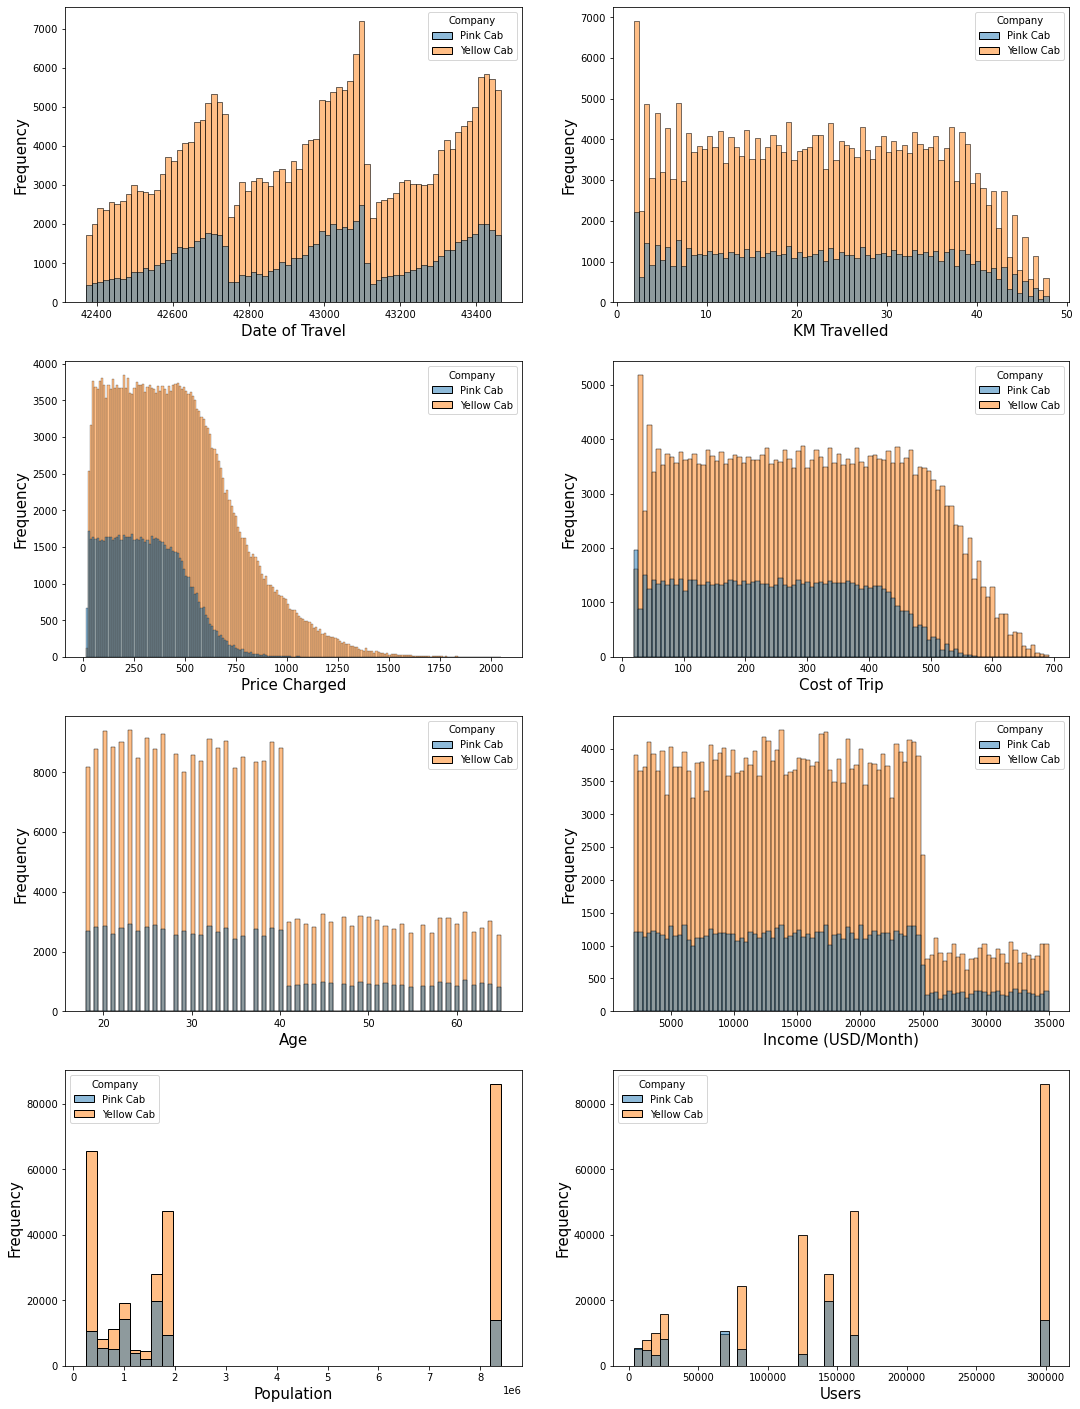

In [22]:
numerical_att=['Date of Travel','KM Travelled','Price Charged','Cost of Trip','Age','Income (USD/Month)',\
               'Population','Users']

def plot_histogram(dataset,attribute,ax):
    #ax.hist(dataset[attribute],bins=50)
    sns.histplot(data=dataset,x=attribute,hue='Company',ax=ax)
    ax.set_xlabel(attribute,fontsize=15)
    ax.set_ylabel('Frequency',fontsize=15)
    

fig,((ax1,ax2),(ax3,ax4),(ax5,ax6),(ax7,ax8))=plt.subplots(4,2,figsize=(18,25))
axes=fig.get_axes()

for i,att in enumerate(numerical_att):
    plot_histogram(dataset,att,axes[i])


In the graphics you can see the following:
* There seems to be a _seasonality_ in the **Date of Travel** attribute, it will be discussed later in Contextual Analysis.
* The **Price Charged** attribute has a _skew distribution_ which may be due to _outliers_ or incorrect data.
* The **Cost of Trip** attribute has in its first part a uniform distribution and then a _skew distribution_ which may be due to _outliers_ or incorrect data.
* The attributes **Population** and **Users** have a random distribution and each different value corresponds to a different city.
* The other attributes have uniform distributions until a certain value and then the frequency decreases.
* In each histogram, can be seen that there are more data from _Yellow Cab_ than _Pink Cab_.
    

#### Outliers detectIon

Since inconsistent values were not found, the filtering by IQR Score will be performed to find outliers.

<AxesSubplot:xlabel='Cost of Trip', ylabel='Company'>

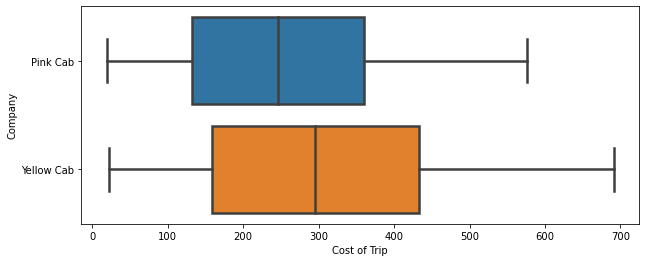

In [23]:
fig, ax = plt.subplots(figsize=(10,4))
sns.boxplot(x="Cost of Trip", y="Company",data=dataset, linewidth=2.5)

<AxesSubplot:xlabel='Price Charged', ylabel='Company'>

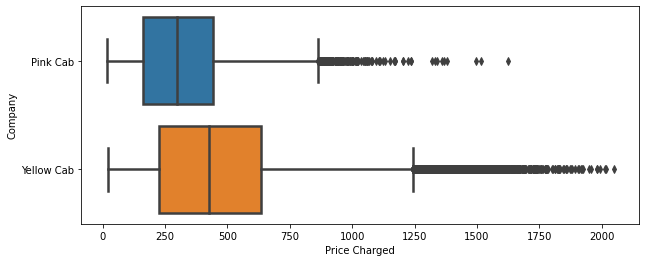

In [24]:
fig, ax = plt.subplots(figsize=(10,4))
#sns.boxplot(x = dataset["Price Charged"], ax=ax,palette="Set2")
sns.boxplot(x="Price Charged", y="Company",data=dataset, linewidth=2.5)

The figure shows that there are outliers in **Price Charged** attribute in both companies,now the **interquartile range (IQR)** will be used to show which are the outliers.    
To do this it's necessary calculate the **IQR** for both companies. 

In [25]:
# the dataset divided by company
dataset_pink=dataset[dataset['Company']=='Pink Cab']
dataset_yellow=dataset[dataset['Company']=='Yellow Cab']

# calculate quantile statistics 
IQR_pink,Q1_pink,Q3_pink=quantile_statistics(dataset_pink)
IQR_yellow,Q1_yellow,Q3_yellow=quantile_statistics(dataset_yellow)

# calculate the whiskers 
lower_whisker_pink=Q1_pink['Price Charged'] - 1.5 * IQR_pink['Price Charged']
top_whisker_pink=Q3_pink['Price Charged'] + 1.5 * IQR_pink['Price Charged']

lower_whisker_yellow=Q1_yellow['Price Charged'] - 1.5 * IQR_yellow['Price Charged']
top_whisker_yellow=Q3_yellow['Price Charged'] + 1.5 * IQR_yellow['Price Charged']

# find outliers
outliers_location_pink=(dataset_pink['Price Charged'] < lower_whisker_pink )\
                                 |(dataset_pink['Price Charged'] > top_whisker_pink )

outliers_location_yellow=(dataset_yellow['Price Charged'] < lower_whisker_yellow )\
                                 |(dataset_yellow['Price Charged'] > top_whisker_yellow )




In [27]:
# percentage of outliers

p_pink=(dataset_pink['Price Charged'][outliers_location_pink].count()/dataset_pink['Price Charged'].count())*100
p_yellow=(dataset_yellow['Price Charged'][outliers_location_yellow].count()/dataset_yellow['Price Charged'].count())*100
print('There are {:.3}% outliers in the Price Charged attribute for the company Pink Cab'.format(p_pink))
print('There are {:.3}% outliers in the Price Charged attribute for the company Yellow Cab'.format(p_yellow))

There are 0.28% outliers in the Price Charged attribute for the company Pink Cab
There are 1.18% outliers in the Price Charged attribute for the company Yellow Cab


Since the percentage of outliers is small (0.28 and 1.18%) removed them will not have a great impact.

In [28]:
#dataset=dataset[~outliers_location]
dataset_pink=dataset_pink[~outliers_location_pink]
dataset_yellow=dataset_yellow[~outliers_location_yellow]
dataset=pd.concat([dataset_pink,dataset_yellow],axis=0)
dataset.reset_index(drop=True)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011.0,42377.0,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290.0,Card,Male,28.0,10813.0,814885.0,24701.0
1,10000012.0,42375.0,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703.0,Card,Male,27.0,9237.0,814885.0,24701.0
2,10395626.0,43400.0,Pink Cab,ATLANTA GA,13.39,167.03,141.9340,27703.0,Card,Male,27.0,9237.0,814885.0,24701.0
3,10000013.0,42371.0,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712.0,Cash,Male,53.0,11242.0,814885.0,24701.0
4,10000014.0,42376.0,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,28020.0,Cash,Male,23.0,23327.0,814885.0,24701.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355910,10307228.0,43162.0,Yellow Cab,WASHINGTON DC,38.40,668.93,525.3120,51406.0,Cash,Female,29.0,6829.0,418859.0,127001.0
355911,10319775.0,43203.0,Yellow Cab,WASHINGTON DC,3.57,67.60,44.5536,51406.0,Cash,Female,29.0,6829.0,418859.0,127001.0
355912,10347676.0,43287.0,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,51406.0,Card,Female,29.0,6829.0,418859.0,127001.0
355913,10358624.0,43314.0,Yellow Cab,WASHINGTON DC,27.60,358.23,364.3200,51406.0,Cash,Female,29.0,6829.0,418859.0,127001.0


### Categorical attributes 

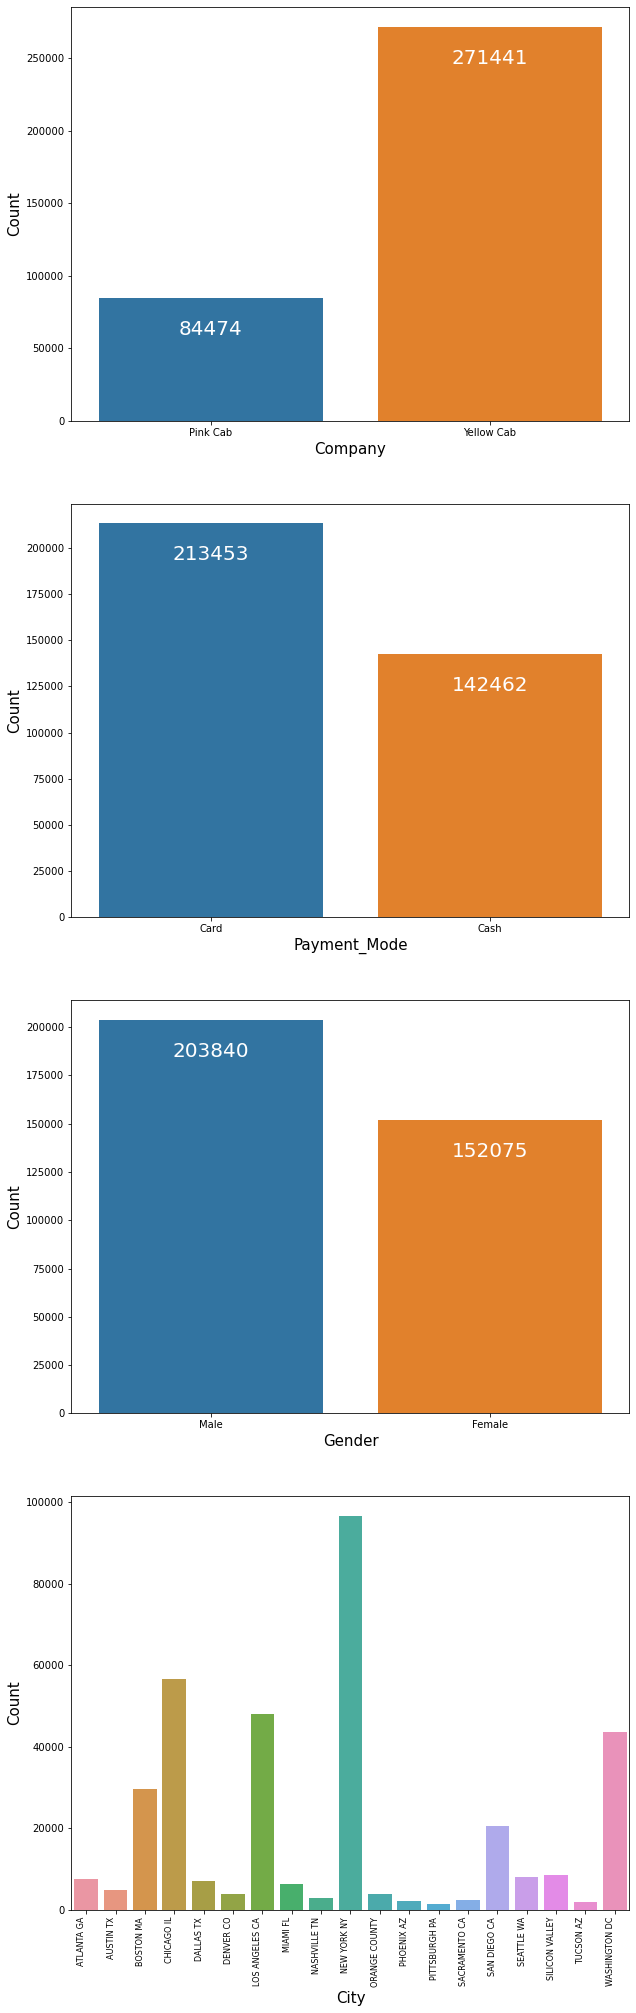

In [30]:
categorical_att=['Company','Payment_Mode','Gender','City']


def plot_bar(dataset,attribute,ax):
    
    sns.countplot(data=dataset,x=attribute,ax=ax)
    ax.set_xlabel(attribute,fontsize=15)
    if attribute=='City':
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=8)
        
    ax.set_ylabel('Count',fontsize=15)
    for p in ax.patches:
        if attribute!='City':
            ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='white', size=20)
    
fig,((ax1),(ax2),(ax3),(ax4))=plt.subplots(4,1,figsize=(10,35))
axes=fig.get_axes()

for i,att in enumerate(categorical_att):
    plot_bar(dataset,att,axes[i])

In the graphics you can see the following:
* It is confirmed that the number of transactions of the Yellow Cab company is much larger (more than triple ) than the Pink Cab company.
* People prefer pay by card. 
* More men than women pay for trips.
* the cities like New York ,Chicago, Los Angeles and Washington DC. are the ones that accumulate the most transactions
 

## Correlation Analysis

### Categorial vs Categorical

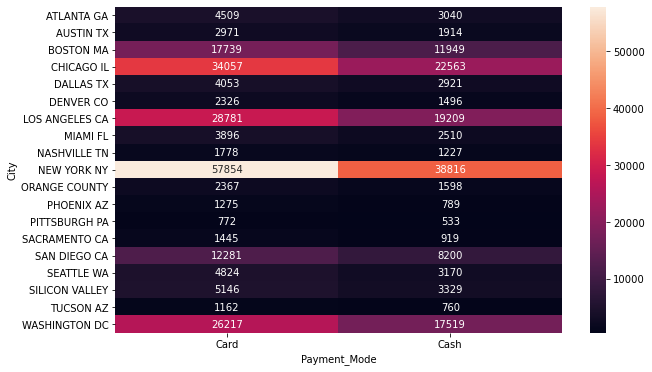

In [31]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(pd.crosstab(index=dataset['City'], columns=dataset['Payment_Mode']),ax=ax,annot=True,fmt='d')
plt.show()

There does not seem to be a correlation between **City** and **Payment_Mode** since in almost all cities the ratio between the use of cash and card is the same (around 1.5)

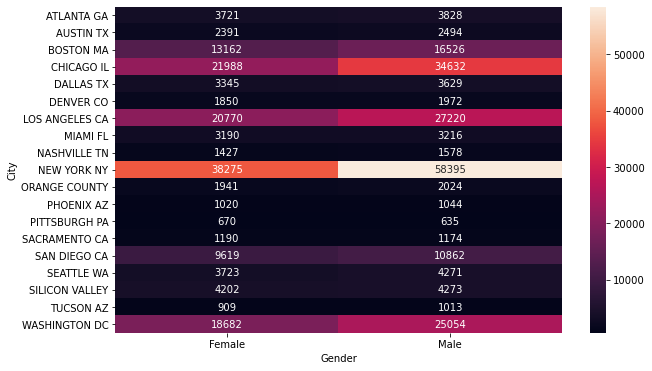

In [32]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(pd.crosstab(index=dataset['City'], columns=dataset['Gender']),ax=ax,annot=True,fmt='d')
plt.show()

In [33]:
dataset[['City','Population','Users']].drop_duplicates().\
        sort_values(by='Users',ascending=False).reset_index(drop=True).iloc[0:6]

,City,Population,Users
0,NEW YORK NY,8405837.0,302149.0
1,CHICAGO IL,1955130.0,164468.0
2,LOS ANGELES CA,1595037.0,144132.0
3,WASHINGTON DC,418859.0,127001.0
4,BOSTON MA,248968.0,80021.0
5,SAN DIEGO CA,959307.0,69995.0


It shows that there are more transactions carried out by men compared to women in cities with more users and with more population(New York,Chicago,Los Angeles,Washington and Boston)

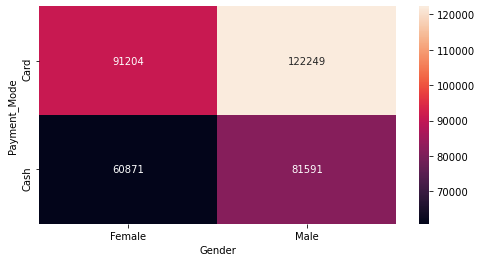

In [34]:
fig, ax = plt.subplots(figsize=(8,4))
sns.heatmap(pd.crosstab(index=dataset['Payment_Mode'], columns=dataset['Gender']),annot=True,fmt='d',ax=ax)
plt.show()

There does not appear to be any correlation between **Payment_Mode** and **Gender**.

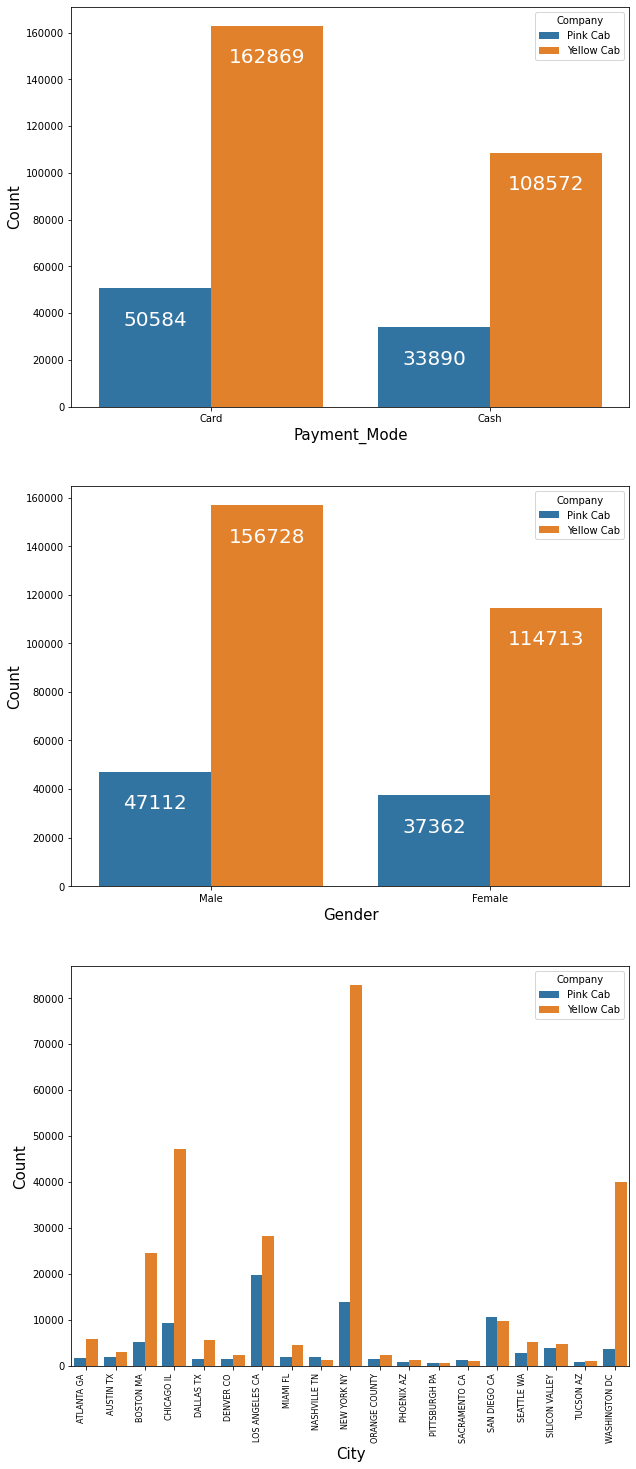

In [35]:
categorical_att=['Payment_Mode','Gender','City']

def plot_bar(dataset,attribute,ax):
    
    sns.countplot(data=dataset,x=attribute,hue='Company',ax=ax)
    ax.set_xlabel(attribute,fontsize=15)
    if attribute=='City':
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=8)
    
    ax.set_ylabel('Count',fontsize=15)
    for p in ax.patches:
        if attribute!='City':
            ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=20)
    
fig,((ax1),(ax2),(ax3))=plt.subplots(3,1,figsize=(10,25))
axes=fig.get_axes()

for i,att in enumerate(categorical_att):
    plot_bar(dataset,att,axes[i])

In [36]:
dataset[['City','Population','Users']].drop_duplicates().\
        sort_values(by='Users',ascending=False).reset_index(drop=True).iloc[0:6]


,City,Population,Users
0,NEW YORK NY,8405837.0,302149.0
1,CHICAGO IL,1955130.0,164468.0
2,LOS ANGELES CA,1595037.0,144132.0
3,WASHINGTON DC,418859.0,127001.0
4,BOSTON MA,248968.0,80021.0
5,SAN DIEGO CA,959307.0,69995.0


In the graphics you can see the following:

* The Yellow Cab company has a higher number of transactions in the 6 cities with the most population and the most taxi users. 
* The Pink Cab company competes with company Yellow Cab in number of trips (transactions) in cities such as: Los Angeles and San Diego


#### Chi-squared Test

In [37]:
def chi_squared(contingency_table):
    
    """ function to performed the chi-squared test"""
    
    stat, p, dof, expected = chi2_contingency(contingency_table)

    # interpret test-statistic
    prob = 0.95
    critical = chi2.ppf(prob, dof)
    print('Interpret test-statistic')
    print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
    if abs(stat) >= critical:
        print('Dependent (reject H0)')
    else:
        print('Independent (fail to reject H0)')
    print('\n')

    # interpret p-value
    alpha = 1.0 - prob
    print('Interpret p-value')
    print('significance=%.3f, p=%.3f' % (alpha, p))
    if p <= alpha:
        print('Dependent (reject H0)')
    else:
        print('Independent (fail to reject H0)')
    

#### Chi-squared test - City vs Gender

In [38]:
chi_squared(pd.crosstab(index=dataset['City'], columns=dataset['Gender']))

Interpret test-statistic
probability=0.950, critical=28.869, stat=1846.991
Dependent (reject H0)


Interpret p-value
significance=0.050, p=0.000
Dependent (reject H0)


The variables **City** and **Gender** are correlated

#### Chi-squared test - Company vs City

In [39]:
chi_squared(pd.crosstab(index=dataset['Company'], columns=dataset['City']))

Interpret test-statistic
probability=0.950, critical=28.869, stat=39096.492
Dependent (reject H0)


Interpret p-value
significance=0.050, p=0.000
Dependent (reject H0)


The variables **Company** and **City** are correlated

### Numerical vs Numerical

The variable **Profit** will be added to improve the analysis, this variable will be used as target when building the ML model.

In [51]:
dataset['Profit']=dataset['Price Charged']-dataset['Cost of Trip']
dataset

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Porfit
0,10000011.0,42377.0,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290.0,Card,Male,28.0,10813.0,814885.0,24701.0,57.3150
3,10000012.0,42375.0,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703.0,Card,Male,27.0,9237.0,814885.0,24701.0,23.6660
6,10395626.0,43400.0,Pink Cab,ATLANTA GA,13.39,167.03,141.9340,27703.0,Card,Male,27.0,9237.0,814885.0,24701.0,25.0960
7,10000013.0,42371.0,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712.0,Cash,Male,53.0,11242.0,814885.0,24701.0,27.5680
11,10000014.0,42376.0,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,28020.0,Cash,Male,23.0,23327.0,814885.0,24701.0,25.7980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440093,10307228.0,43162.0,Yellow Cab,WASHINGTON DC,38.40,668.93,525.3120,51406.0,Cash,Female,29.0,6829.0,418859.0,127001.0,143.6180
440094,10319775.0,43203.0,Yellow Cab,WASHINGTON DC,3.57,67.60,44.5536,51406.0,Cash,Female,29.0,6829.0,418859.0,127001.0,23.0464
440095,10347676.0,43287.0,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,51406.0,Card,Female,29.0,6829.0,418859.0,127001.0,-5.8540
440096,10358624.0,43314.0,Yellow Cab,WASHINGTON DC,27.60,358.23,364.3200,51406.0,Cash,Female,29.0,6829.0,418859.0,127001.0,-6.0900


In [53]:
correlation_matrix=dataset.corr()
correlation_matrix

,Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip,Customer ID,Age,Income (USD/Month),Population,Users,Porfit
Transaction ID,1.000000,0.992982,0.005222,-0.039354,0.003519,-0.020563,-0.001370,-0.001473,0.030729,0.019315,-0.073758
Date of Travel,0.992982,1.000000,0.005134,-0.041972,0.002584,-0.021353,-0.001438,-0.001292,0.029001,0.017595,-0.077411
KM Travelled,0.005222,0.005134,1.000000,0.844188,0.981681,0.012158,-0.000055,-0.000775,-0.024185,-0.019308,0.447617
Price Charged,-0.039354,-0.041972,0.844188,1.000000,0.868241,-0.161507,-0.002761,0.002791,0.299825,0.257067,0.846442
Cost of Trip,0.003519,0.002584,0.981681,0.868241,1.000000,0.015580,0.000132,-0.000897,-0.007684,0.004036,0.470728
Customer ID,-0.020563,-0.021353,0.012158,-0.161507,0.015580,1.000000,-0.004952,-0.013548,-0.644530,-0.607732,-0.303924
Age,-0.001370,-0.001438,-0.000055,-0.002761,0.000132,-0.004952,1.000000,0.003782,-0.008802,-0.005648,-0.005051
Income (USD/Month),-0.001473,-0.001292,-0.000775,0.002791,-0.000897,-0.013548,0.003782,1.000000,0.011735,0.010323,0.005926
Population,0.030729,0.029001,-0.024185,0.299825,-0.007684,-0.644530,-0.008802,0.011735,1.000000,0.913951,0.541418
Users,0.019315,0.017595,-0.019308,0.257067,0.004036,-0.607732,-0.005648,0.010323,0.913951,1.000000,0.452803


<AxesSubplot:>

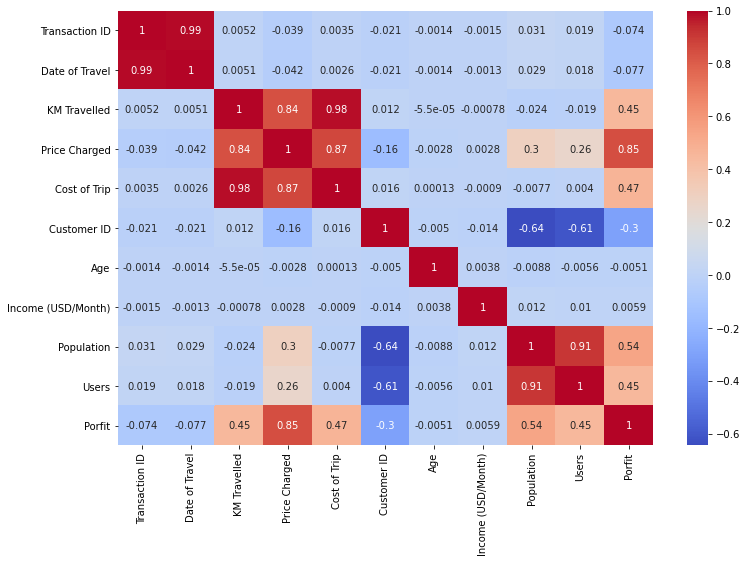

In [56]:
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(data=correlation_matrix,ax=ax,cmap= 'coolwarm',annot=True)

Using the Heat map above, the following can be observed:
* The variables **Population** and **Users** are strongly correlated, so **Population** would be discarded to build the model.
* The new variable **Profit** is strongly correlated with the variables **Price Charged** as expected.
* The new variable **Profit** has a moderate positive correlation with **KM Travelld, Cost of Trip**.
* **Transaction ID** and **Customer ID** are unique identifiers, they will not be used when building the ML model,but they can be used in Contextual Analysis.
* Surprisingly the variable **Income** has no correlation with the objective, so this would be discarded to build the model.
* **KM Travelled** and **Cost of Trip** are strongly correlated, so **KM Travelled** will not used when building the ML model, however if a Neural Network is used as algorithm this feature could be considered.


### Categorical versus numerical

#### Student's t-test

In [63]:
data1 = dataset[dataset['Company']=='Yellow Cab']['Porfit']
data2 = dataset[dataset['Company']=='Pink Cab']['Porfit']
# compare samples
stat, p = ttest_ind(data1, data2,)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=163.837, p=0.000
Different distributions (reject H0)


The target Profit is trongly correlated with the variable Company

In [64]:
data1 = dataset[dataset['Gender']=='Male']['Porfit']
data2 = dataset[dataset['Gender']=='Female']['Porfit']
# compare samples
stat, p = ttest_ind(data1, data2,)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=12.372, p=0.000
Different distributions (reject H0)


The target Profit is trongly correlated with the variable Gender

In [65]:
data1 = dataset[dataset['Payment_Mode']=='Card']['Porfit']
data2 = dataset[dataset['Payment_Mode']=='Cash']['Porfit']
# compare samples
stat, p = ttest_ind(data1, data2,)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=-0.378, p=0.705
Same distributions (fail to reject H0)


The target Profit is not correlated with the variable Gender

## Contextual Analysis
here it is going to the conversion of Date of Trave attribute (TO_TIMESTAMP)

In [101]:
dataset['Date of Travel'].sort_values()

357635    42371.0
394436    42371.0
357536    42371.0
357580    42371.0
248754    42371.0
           ...   
93795     43465.0
102862    43465.0
318305    43465.0
105534    43465.0
83285     43465.0
Name: Date of Travel, Length: 355915, dtype: float64

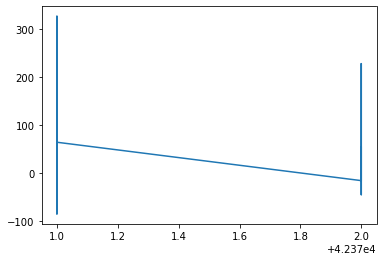

In [104]:
plt.plot(dataset['Date of Travel'].sort_values()[1:300],dataset['Porfit'][1:300])

In [88]:
pd.Timestamp('2016-01-01T00')-pd.Timestamp('2018-12-31T00')


Timedelta('-1095 days +00:00:00')

In [80]:
pd.Timestamp('2016-01-31T00')+pd.Timedelta('1065 days +00:00:00')

Timestamp('2018-12-31 00:00:00')

In [96]:
# 31/01/2016 to 31/12/2018.
np.sort(dataset['Date of Travel'].unique())


array([42371., 42372., 42373., ..., 43463., 43464., 43465.])

In [85]:
dataset['Date of Travel']

0         42377.0
3         42375.0
6         43400.0
7         42371.0
11        42376.0
           ...   
440093    43162.0
440094    43203.0
440095    43287.0
440096    43314.0
440097    43342.0
Name: Date of Travel, Length: 355915, dtype: float64

In [116]:
df_cab_data['Transaction ID'].nunique()

359392

In [35]:
# Time period of data is from 31/01/2016 to 31/12/2018.
df_cab_data['Date of Travel'].nunique()

1095

In [46]:
df_cab_data['Date of Travel'].sort_values()

1030      42371
489       42371
484       42371
850       42371
160       42371
          ...  
355489    43465
354114    43465
356365    43465
359162    43465
358336    43465
Name: Date of Travel, Length: 359392, dtype: int64